In [20]:
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import price_data as price
import statistics


btc_price_data=pd.read_csv('data/Bitstamp_BTCUSD_d.csv')
btc_price_data=btc_price_data.loc[btc_price_data['unix']>=1417392000]
weekly_candles=price.get_price_data('1w',data=btc_price_data)
# candles=[]
# for i in reversed(range(len(btc_price_data))):
#     candle=btc_price_data.iloc[i]
#     candles.append((candle['unix'],candle['open'], candle['high'],candle['low'], candle['close']))

In [2]:
def get_sma(data,window):
     #using daily for now
    timestamps=data['unix']
    closes=list(data['close'])
    l=len(closes)
    sma=[]
    for i in range(window,l):
        last_closes=closes[i-window:i]
        new_average=statistics.mean(last_closes)
        sma.append((timestamps[i-window],new_average))
    # current_price=get_current_price(symbol)
    # last_closes=last_closes[1:]
    # last_closes.append(current_price)
    # sma.append(statistics.mean(last_closes))
    return pd.DataFrame({'unix': list(map(lambda x: x[0], sma)),'value':list(map(lambda x: x[1], sma))})

def get_ema(data,window):
    ema=[]
    sma_start=get_sma(symbol,window,time_interval)
    weight = 2/(window+1)
    return ema


In [27]:
_50day=get_sma(btc_price_data,50)
_50week=get_sma(weekly_candles,50)
#trimming the 50 day data to not exceed the timestamps of the weekly data
min_timestamp=_50week['unix'].min()
max_timestamp=_50week['unix'].max()
_50day=_50day[_50day['unix']>=min_timestamp]
_50day=_50day[_50day['unix']<=max_timestamp]

# price.get_price_data('1w',data=btc_price_data)



1.4162684735101867 0.5407941838762312


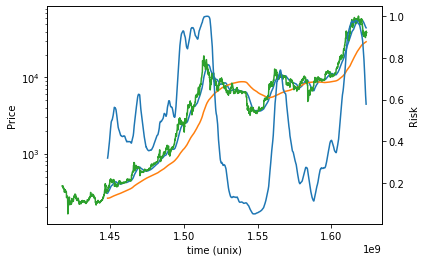

In [29]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('time (unix)')
ax1.set_ylabel('Price')
timestamps=_50day['unix']
ax1.plot(_50day['unix'],_50day['value'])
#plt.plot(_50week['unix'],_50week['value'])
f=interp1d(_50week['unix'],_50week['value'])
weekly_interpolated=f(_50day['unix'])
ax1.plot(_50day['unix'],weekly_interpolated)
risk=np.divide(_50day['value'].values,weekly_interpolated)
ax1.plot(btc_price_data['unix'],btc_price_data['close'])
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.set_ylabel('Risk')
mean=np.mean(risk)
sigma=np.std(risk)
print(mean,sigma)
normalised=(risk-mean)/sigma
ax2.plot(_50day['unix'],norm.cdf(normalised))